# imports

In [1]:
#manipulação de dados
import pandas as pd
import numpy  as np

#visualização
import matplotlib.pyplot as plt
import seaborn           as sns
from IPython.core.display import HTML


# Helper functions

In [2]:
# configuração do jupyter notebook e plotagem de imagens
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1. Load Data

In [3]:
# dados brutos
df_raw = pd.read_csv('C:/Users/Lavin/Documents/desafios/desafio_indicium/data/raw/desafio_manutencao_preditiva_treino.csv')

In [4]:
df_raw.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure


**dataset dimensions**

In [5]:
df_raw.shape

(6667, 9)

Temos um total de 6667 linhas com nove colunas no dataset de teste

## 1.1 Checking data types 

In [6]:
#copia para alterações não afetarem os dados originais
df1 = df_raw.copy()

In [7]:
df1.dtypes

udi                        int64
product_id                object
type                      object
air_temperature_k        float64
process_temperature_k    float64
rotational_speed_rpm       int64
torque_nm                float64
tool_wear_min              int64
failure_type              object
dtype: object

Não será necessário nenhum modificação no tipo dos dados, visto que as colunas já estão em seus devidos formatos

## 1.2 Checking NA

In [8]:
df1.isnull().sum()

udi                      0
product_id               0
type                     0
air_temperature_k        0
process_temperature_k    0
rotational_speed_rpm     0
torque_nm                0
tool_wear_min            0
failure_type             0
dtype: int64

O conjunto de dados não possui nenhum valor ausente, permitindo assim que a análise inicial dos dados seja realizada imediatamente.

# 2. Data description 

'udi': categórico

'product_id': categórico

'type':categotico

'air_temperature_k': numérico

'process_temperature_k':numérico

'rotational_speed_rpm':numérico

'torque_nm':numérico

'tool_wear_min':numérico

'failure_type':categórico


In [1]:
# divisão dos dados em dois dataframes, um categórico e outro numérico
cat_attribures = df1[['udi','product_id','type','failure_type']]
num_attribures = df1[['air_temperature_k','process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']]

NameError: name 'df1' is not defined

## 2.1 Numerical statistics

In [2]:
# estátisticas descritivas
num_statistics = num_attribures.agg(['min','max','mean','median','std','skew','kurtosis']).T
num_statistics['range'] = num_statistics['max'] - num_statistics['min']
num_statistics

NameError: name 'num_attribures' is not defined

**A análise inicial dos atributos numéricos incluiu a verificação de métricas de tendência central, como a média e a mediana, e métricas de dispersão. Na maioria dos casos, a média e a mediana são similares, com exceção do atributo "rotational_speed_rpm", que apresenta uma diferença modesta.**

**Em seguida, será feito o gráfico da distribuição e o boxplot dos atributos para uma melhor visualização de sua distribuição e tendências.**

**Air_temperature**

<AxesSubplot: xlabel='air_temperature_k'>

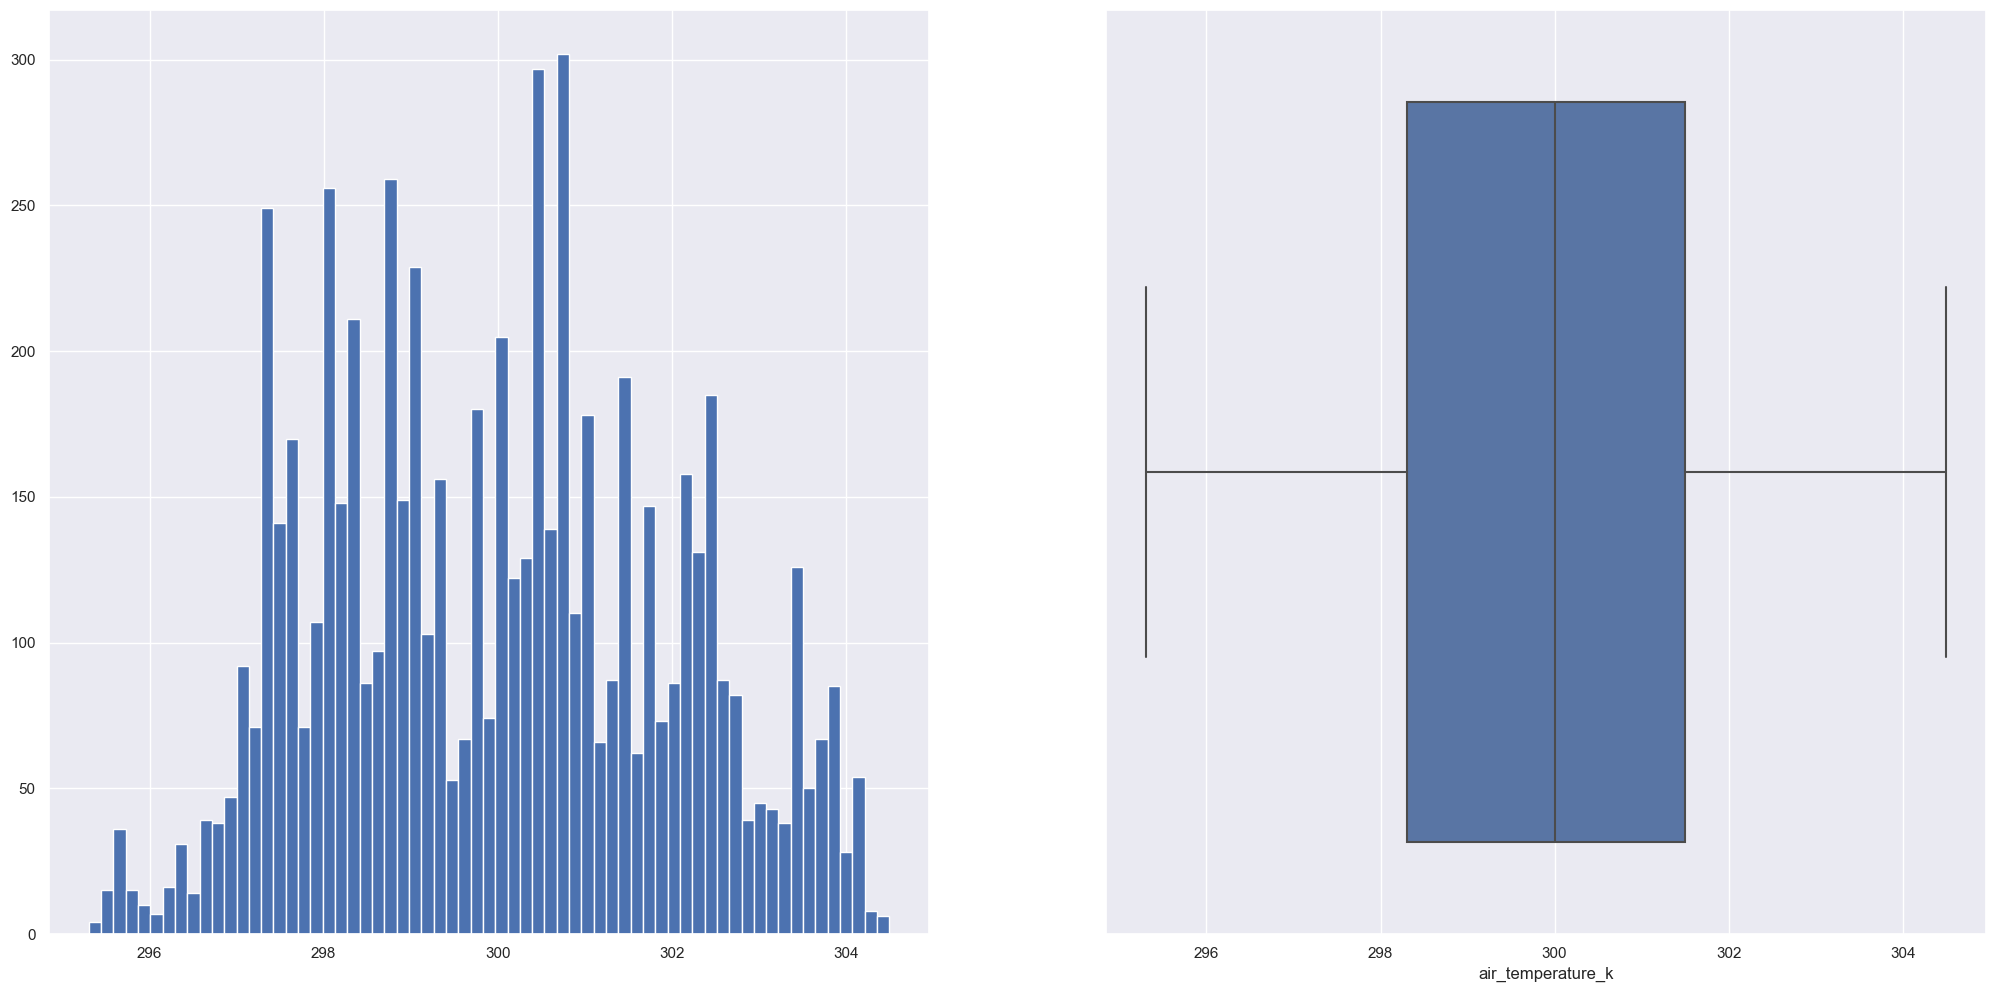

In [15]:
plt.subplot(1,2,1)
num_attribures['air_temperature_k'].hist(bins=65)
plt.subplot(1,2,2)
sns.boxplot(x=num_attribures['air_temperature_k'])

**process_temperature_k**

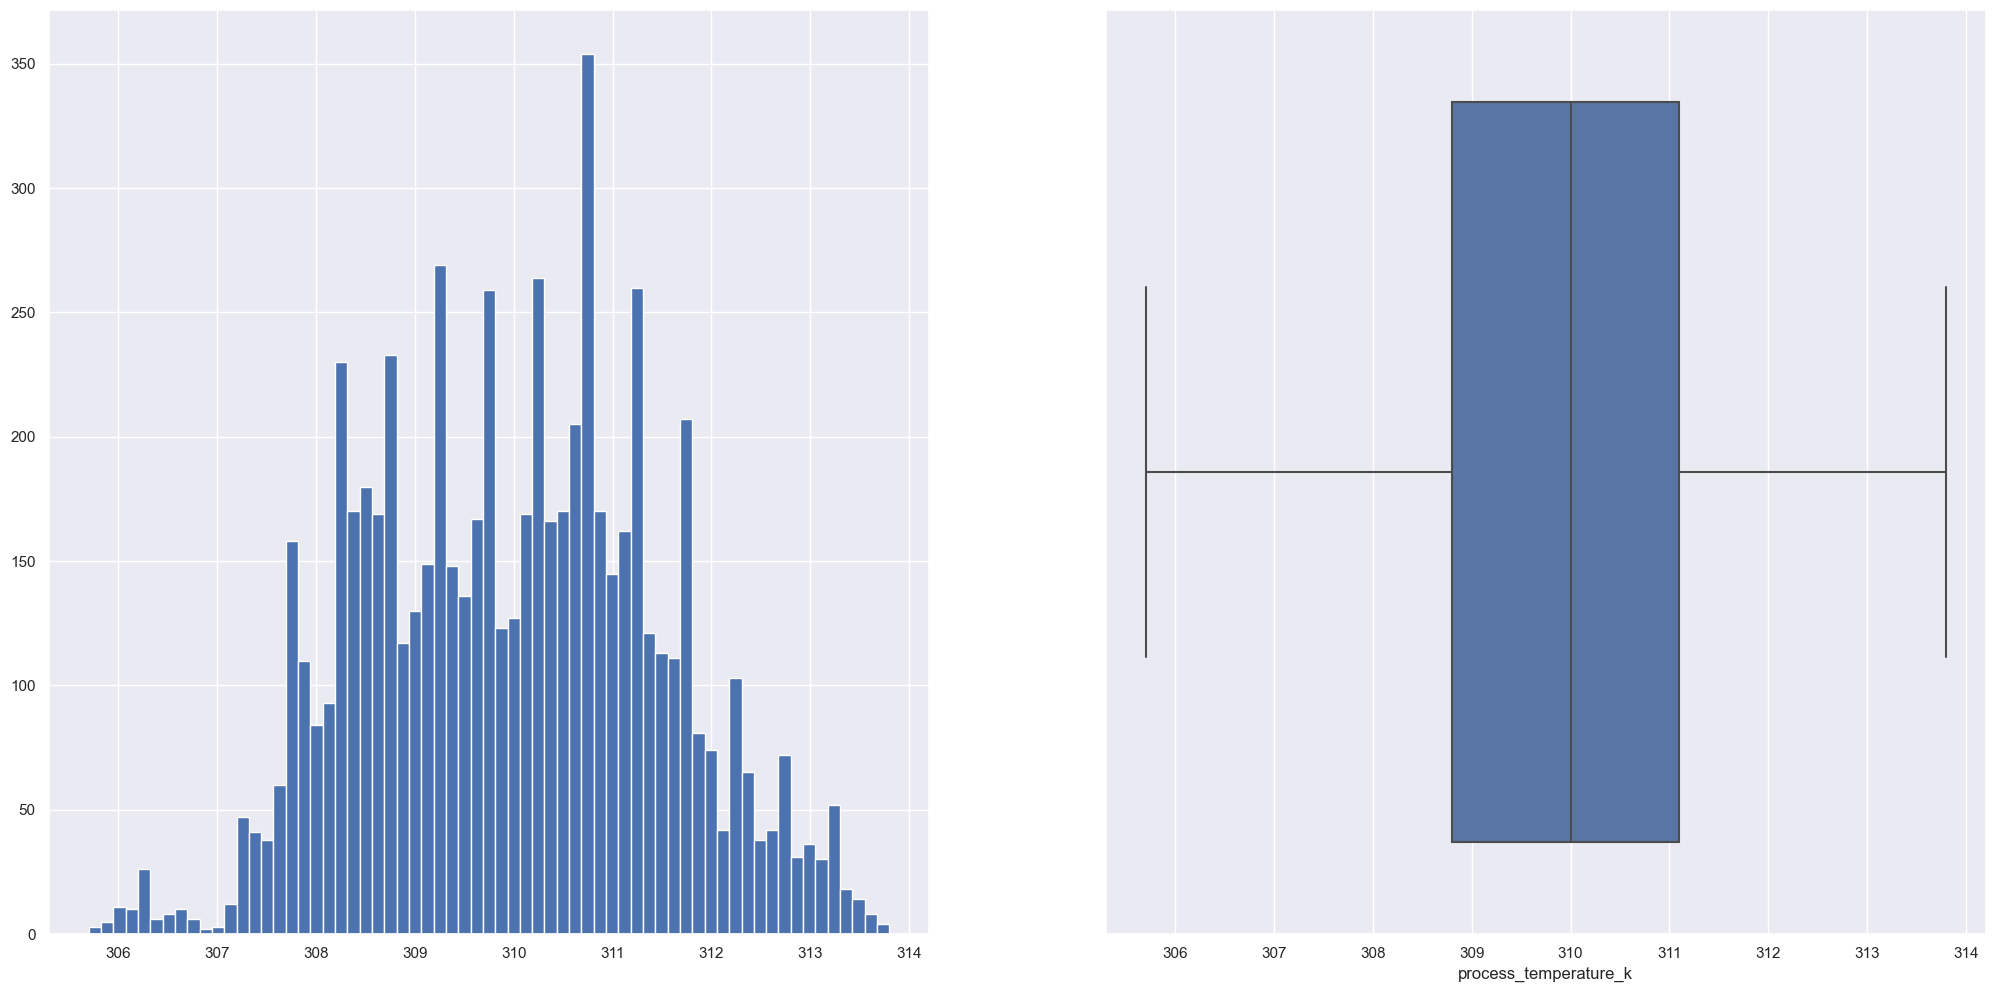

In [17]:
plt.subplot(1,2,1)
num_attribures['process_temperature_k'].hist(bins=65)
plt.subplot(1,2,2)
sns.boxplot(x=num_attribures['process_temperature_k']);

**rotational_speed_rpm**

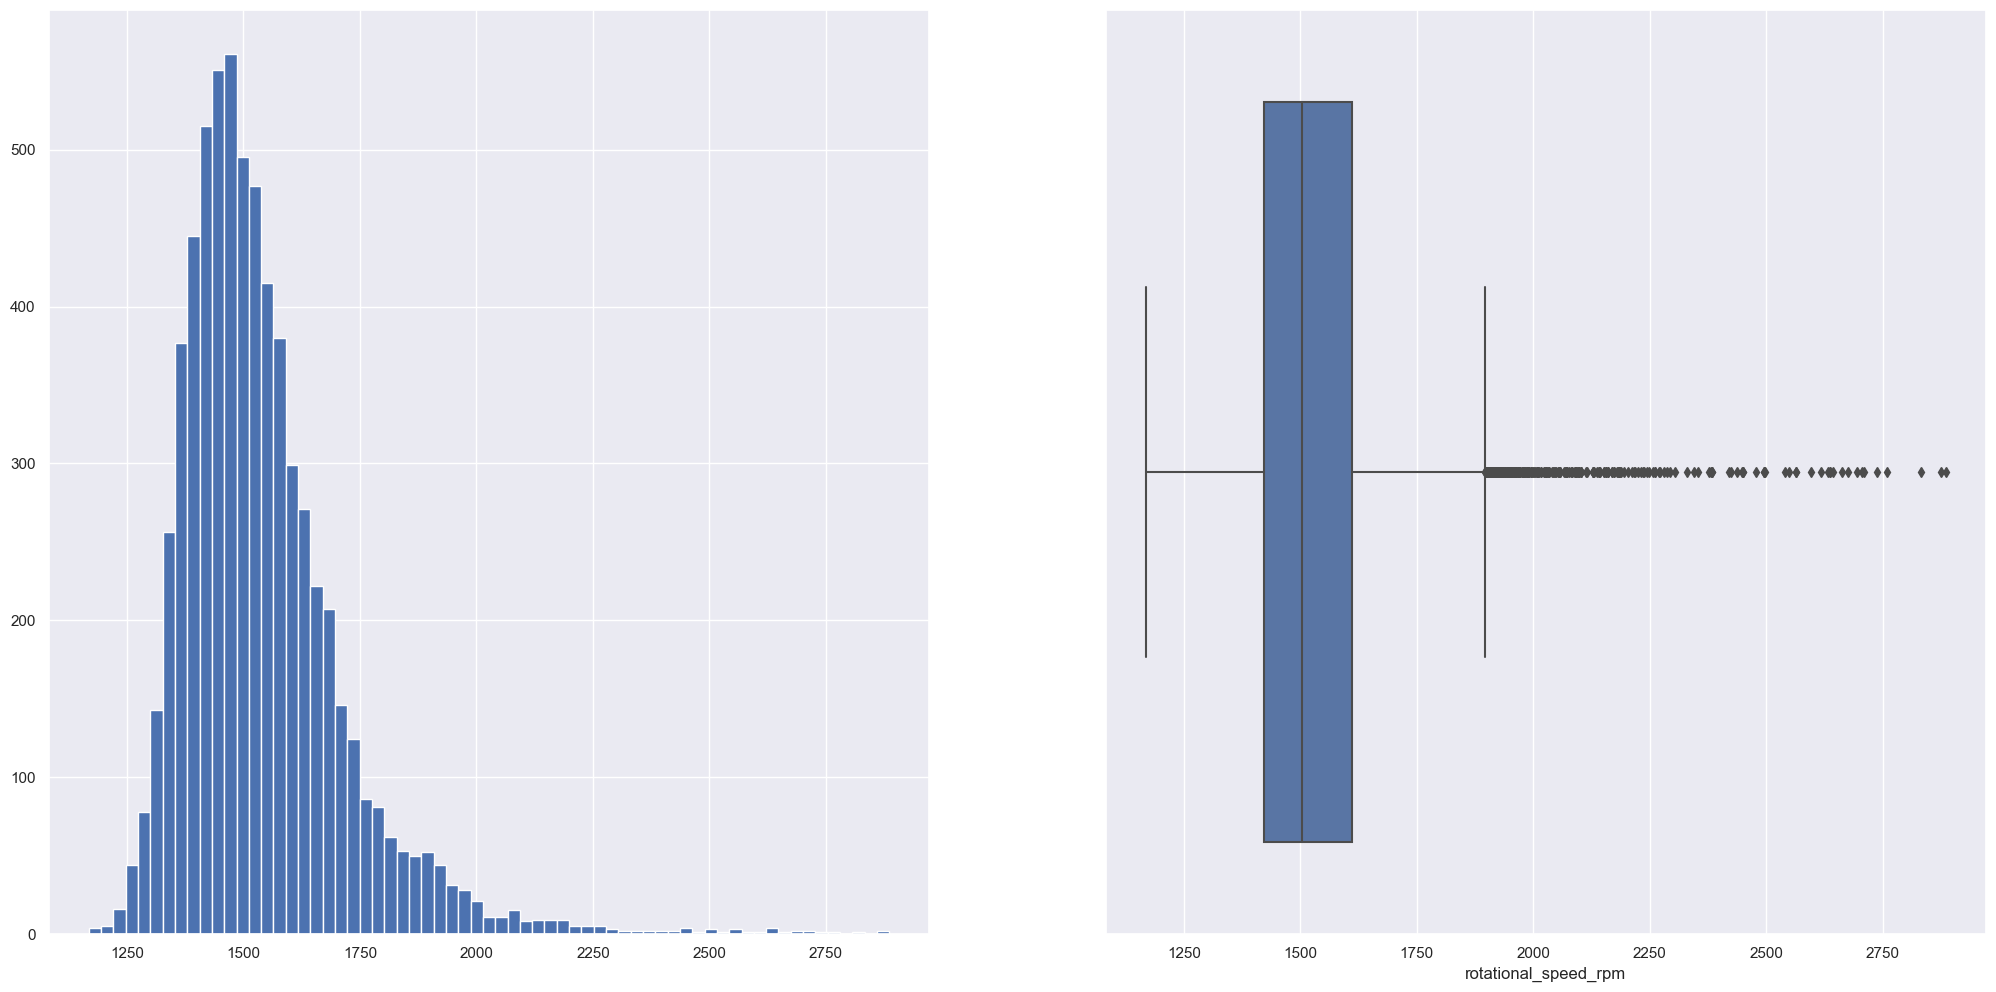

In [19]:
plt.subplot(1,2,1)
num_attribures['rotational_speed_rpm'].hist(bins=65)
plt.subplot(1,2,2)
sns.boxplot(x=num_attribures['rotational_speed_rpm']);

Os dados mostram uma assimetria com uma calda alongada para a direita, e a presença de outliers. Embora os outliers não sejam significativos o suficiente para serem excluídos, eles influenciarão na escolha do tipo de re-escala que será aplicado ao atributo.

**torque_nm**

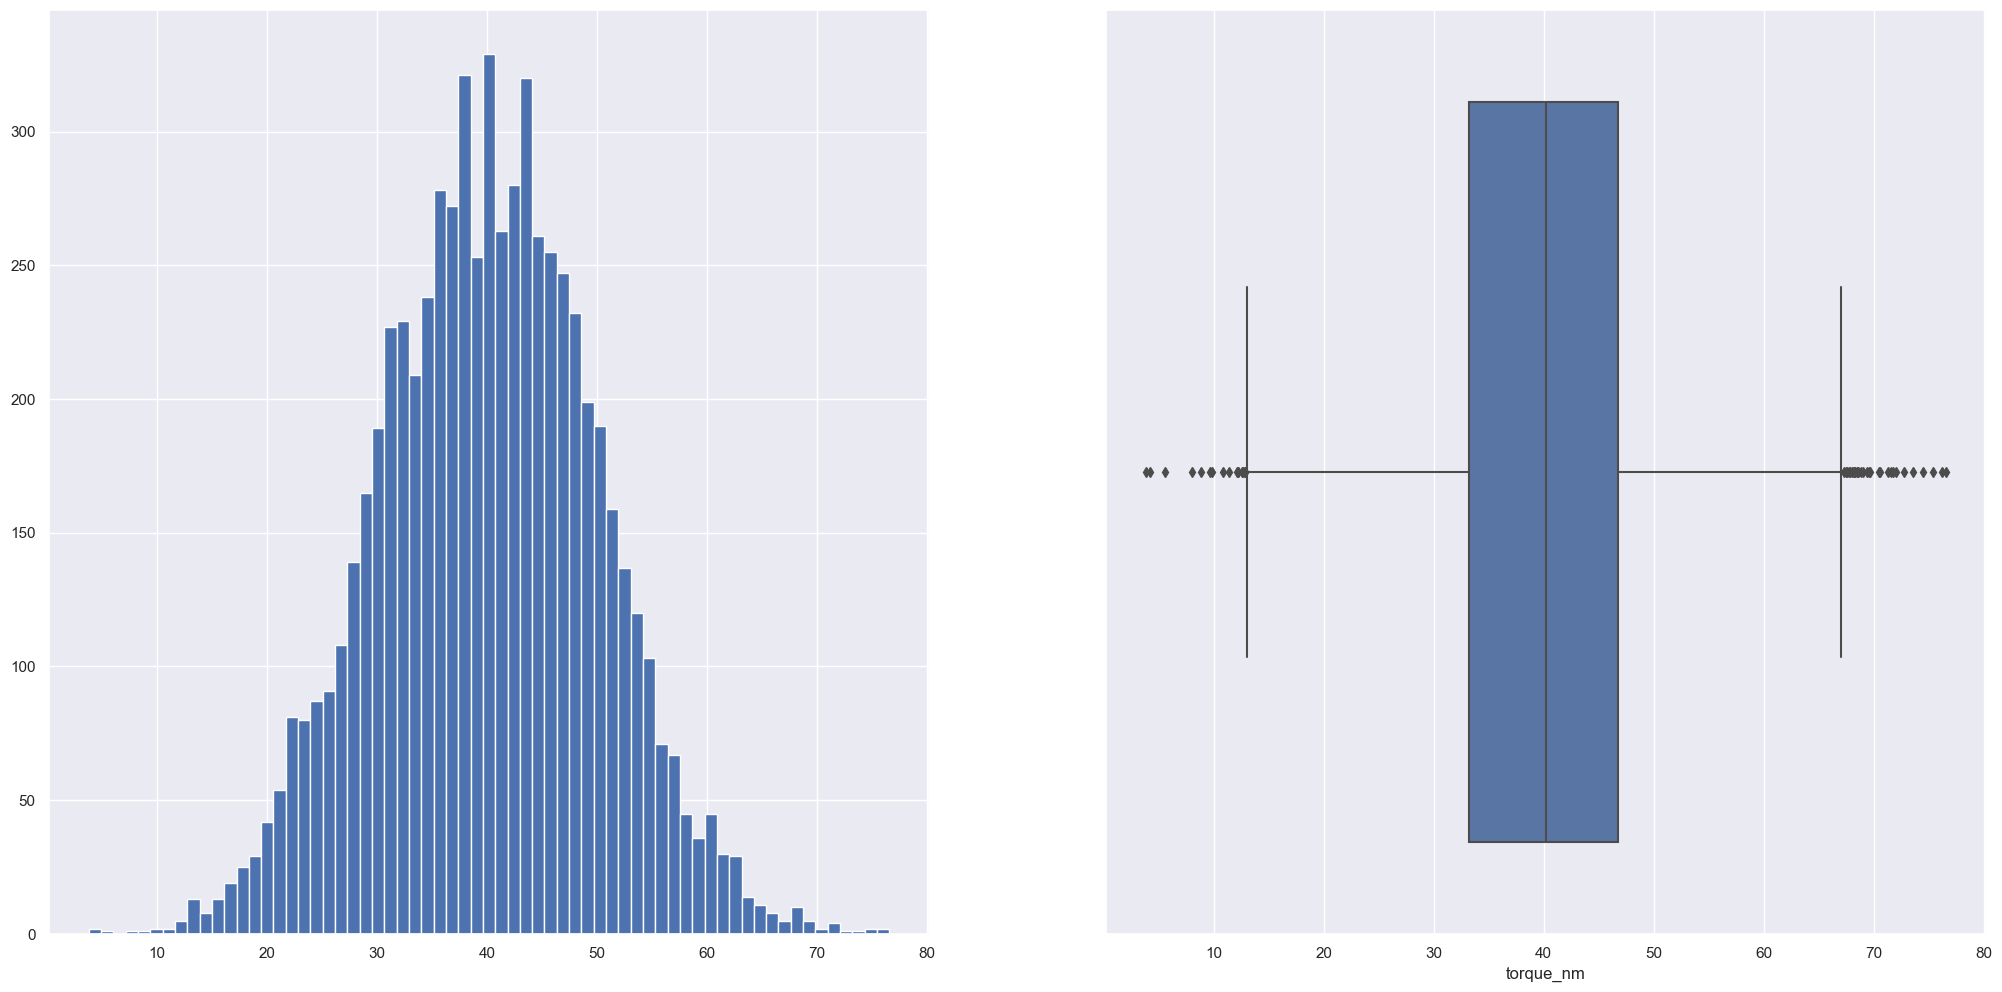

In [24]:
plt.subplot(1,2,1)
num_attribures['torque_nm'].hist(bins=65)
plt.subplot(1,2,2)
sns.boxplot(x=num_attribures['torque_nm']);

**tool_wear_min**

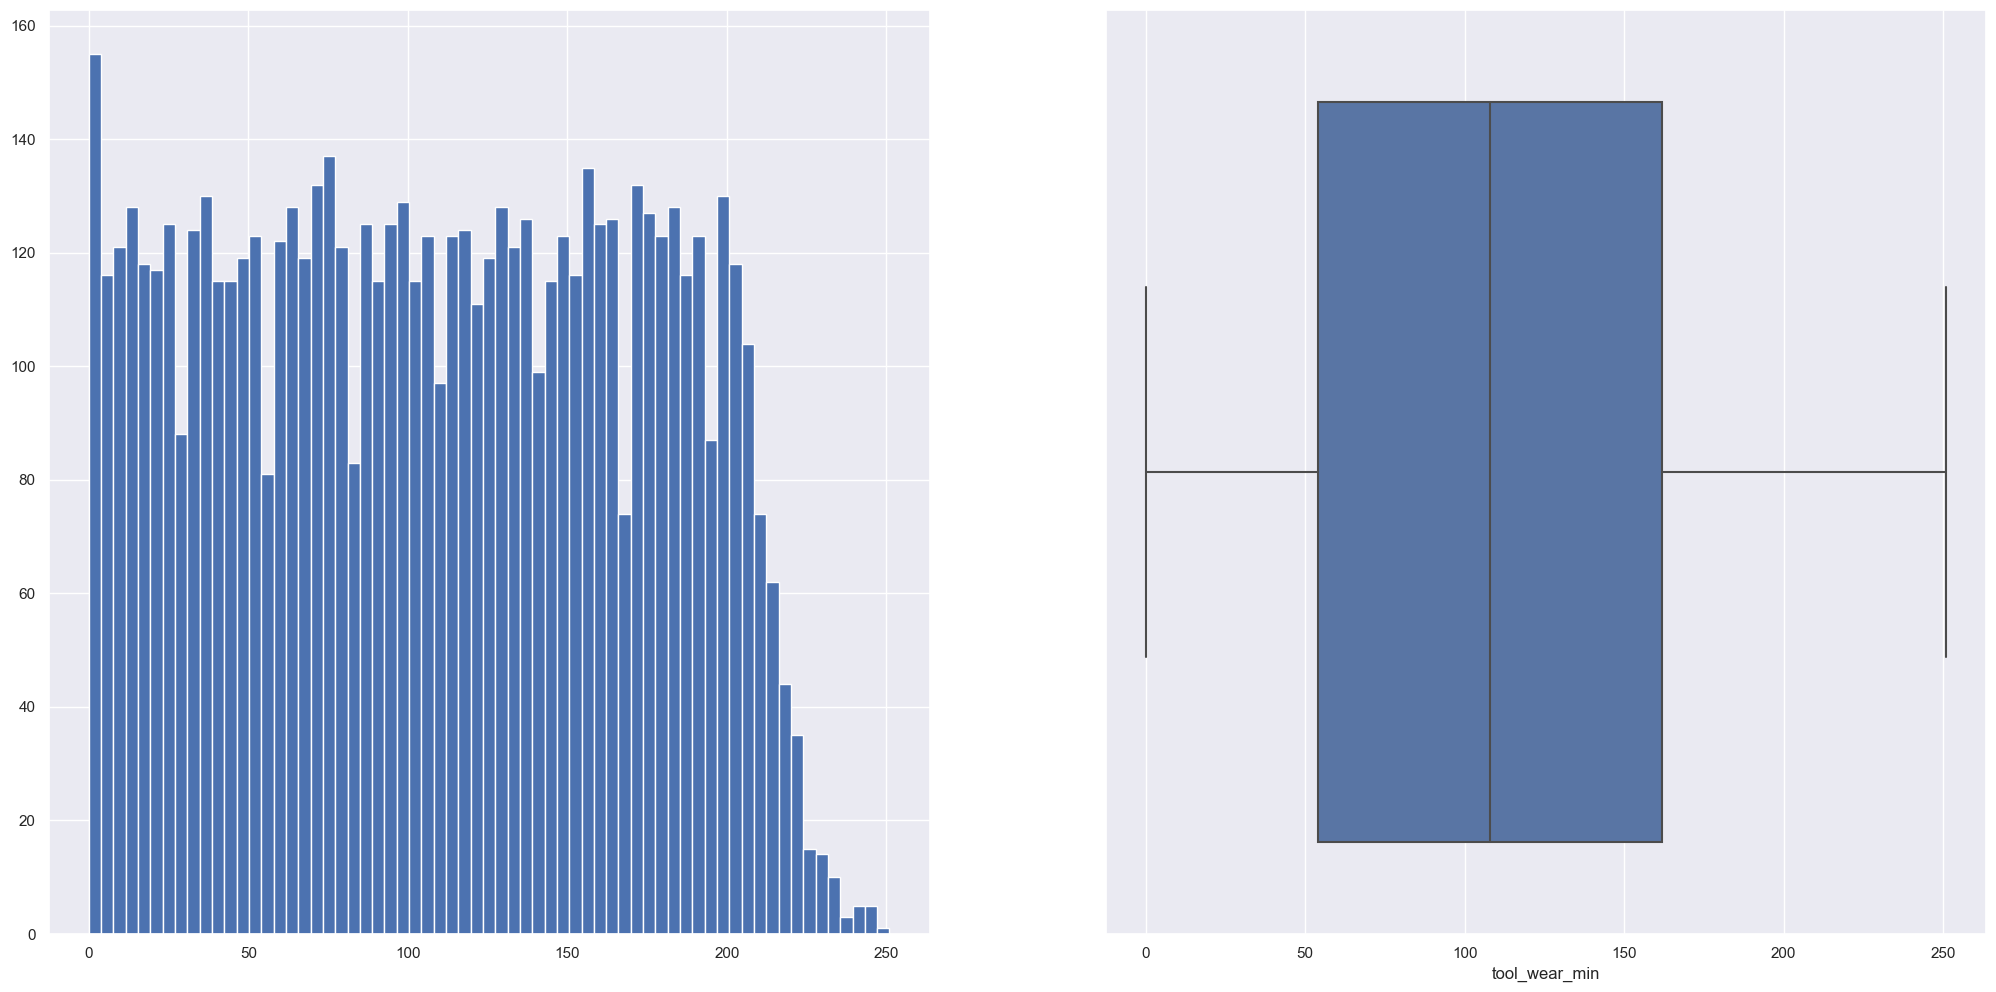

In [25]:
plt.subplot(1,2,1)
num_attribures['tool_wear_min'].hist(bins=65)
plt.subplot(1,2,2)
sns.boxplot(x=num_attribures['tool_wear_min']);

"Rotational_speed_rpm" é o atributo que mais se distancia da distribuição normal entre todos os atributos numéricos. No entanto, no primeiro ciclo não será aplicado nenhum processo de normalização neste atributo.

## 2.1 categorical statistics

In [27]:
# contagem de frequência
cat_attribures.apply(lambda x: x.unique().shape[0])

udi             6667
product_id      6667
type               3
failure_type       6
dtype: int64

A contagem das frequências dos componentes das variáveis categóricas, como as variáveis 'udi' e 'product_id', mostra que não há identificadores duplicados, pois têm a mesma contagem que o tamanho do dataset.

**Type**

<AxesSubplot: xlabel='type', ylabel='count'>

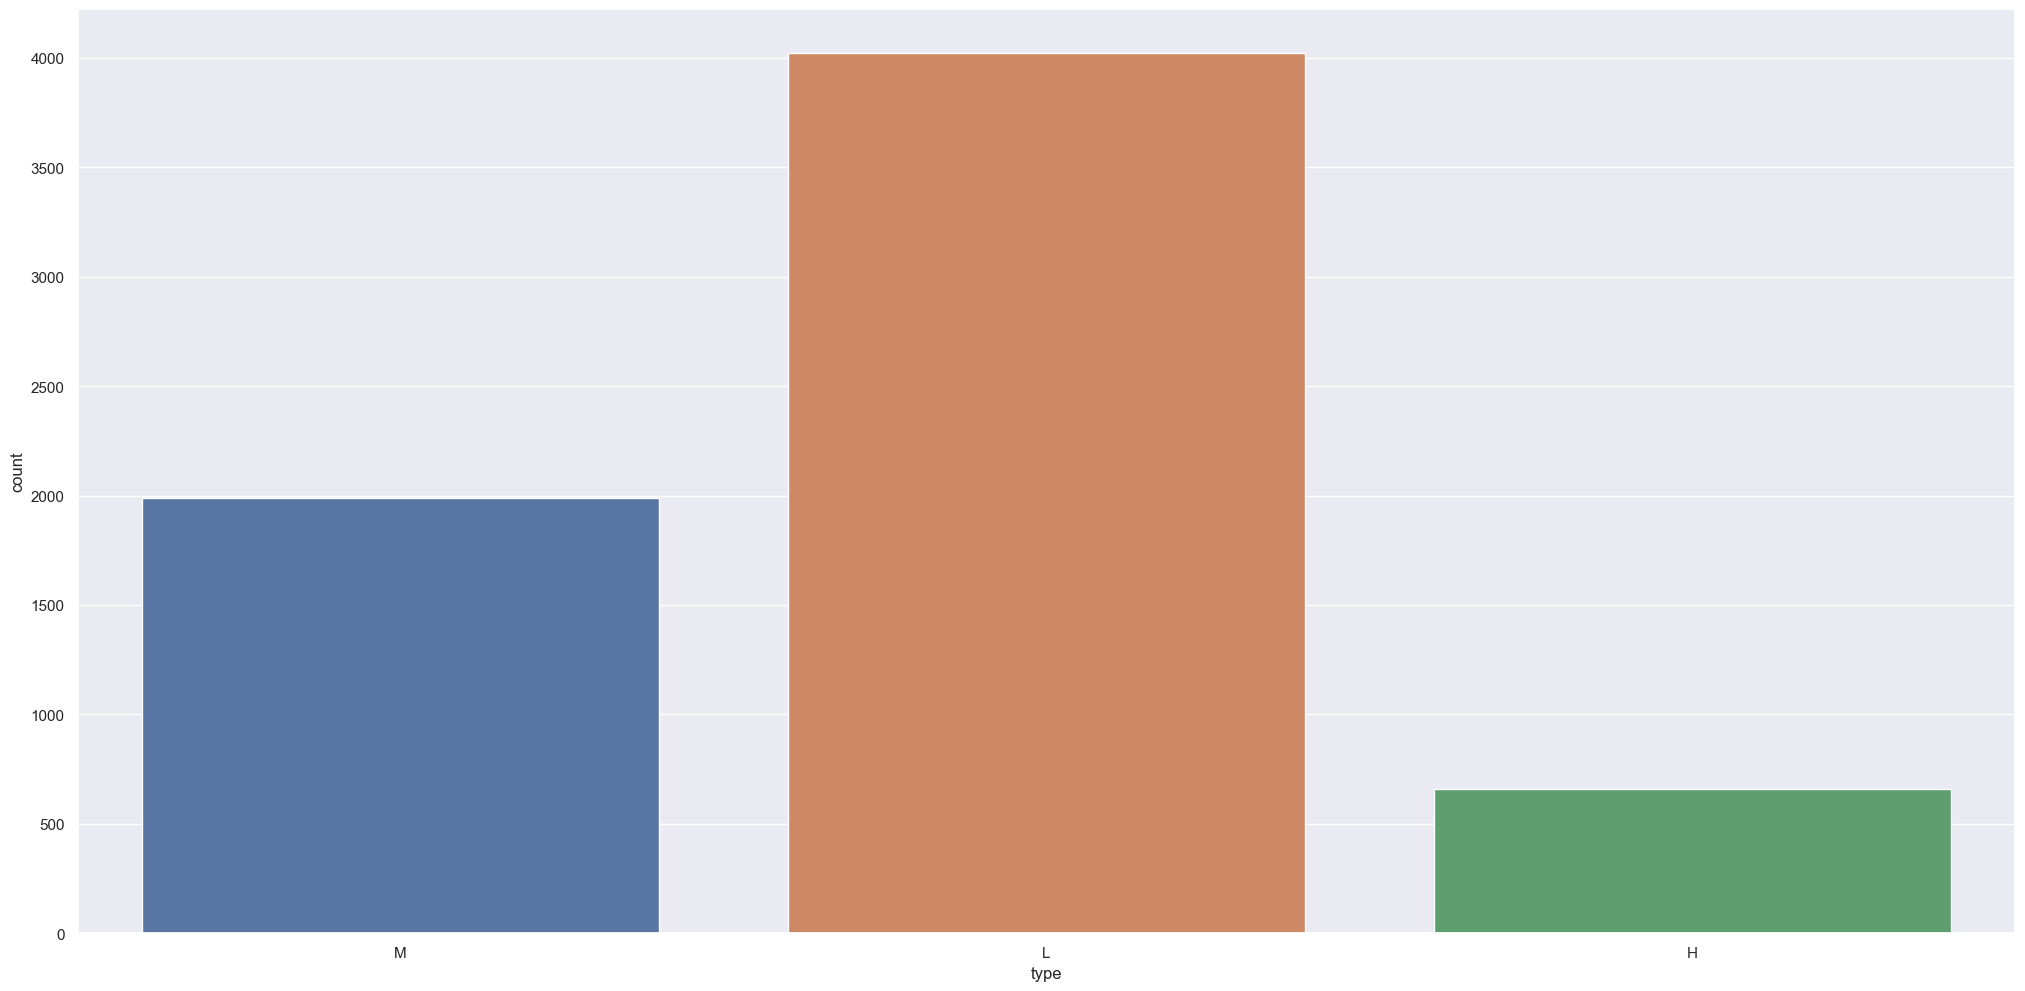

In [31]:
sns.countplot(x='type',data=cat_attribures)

In [32]:
cat_attribures['type'].value_counts(normalize=True)

L    0.603270
M    0.298035
H    0.098695
Name: type, dtype: float64

A variavel 'type' não possui uma distribuição simétrica dos componentes 

**Failure_type**

<AxesSubplot: xlabel='failure_type', ylabel='count'>

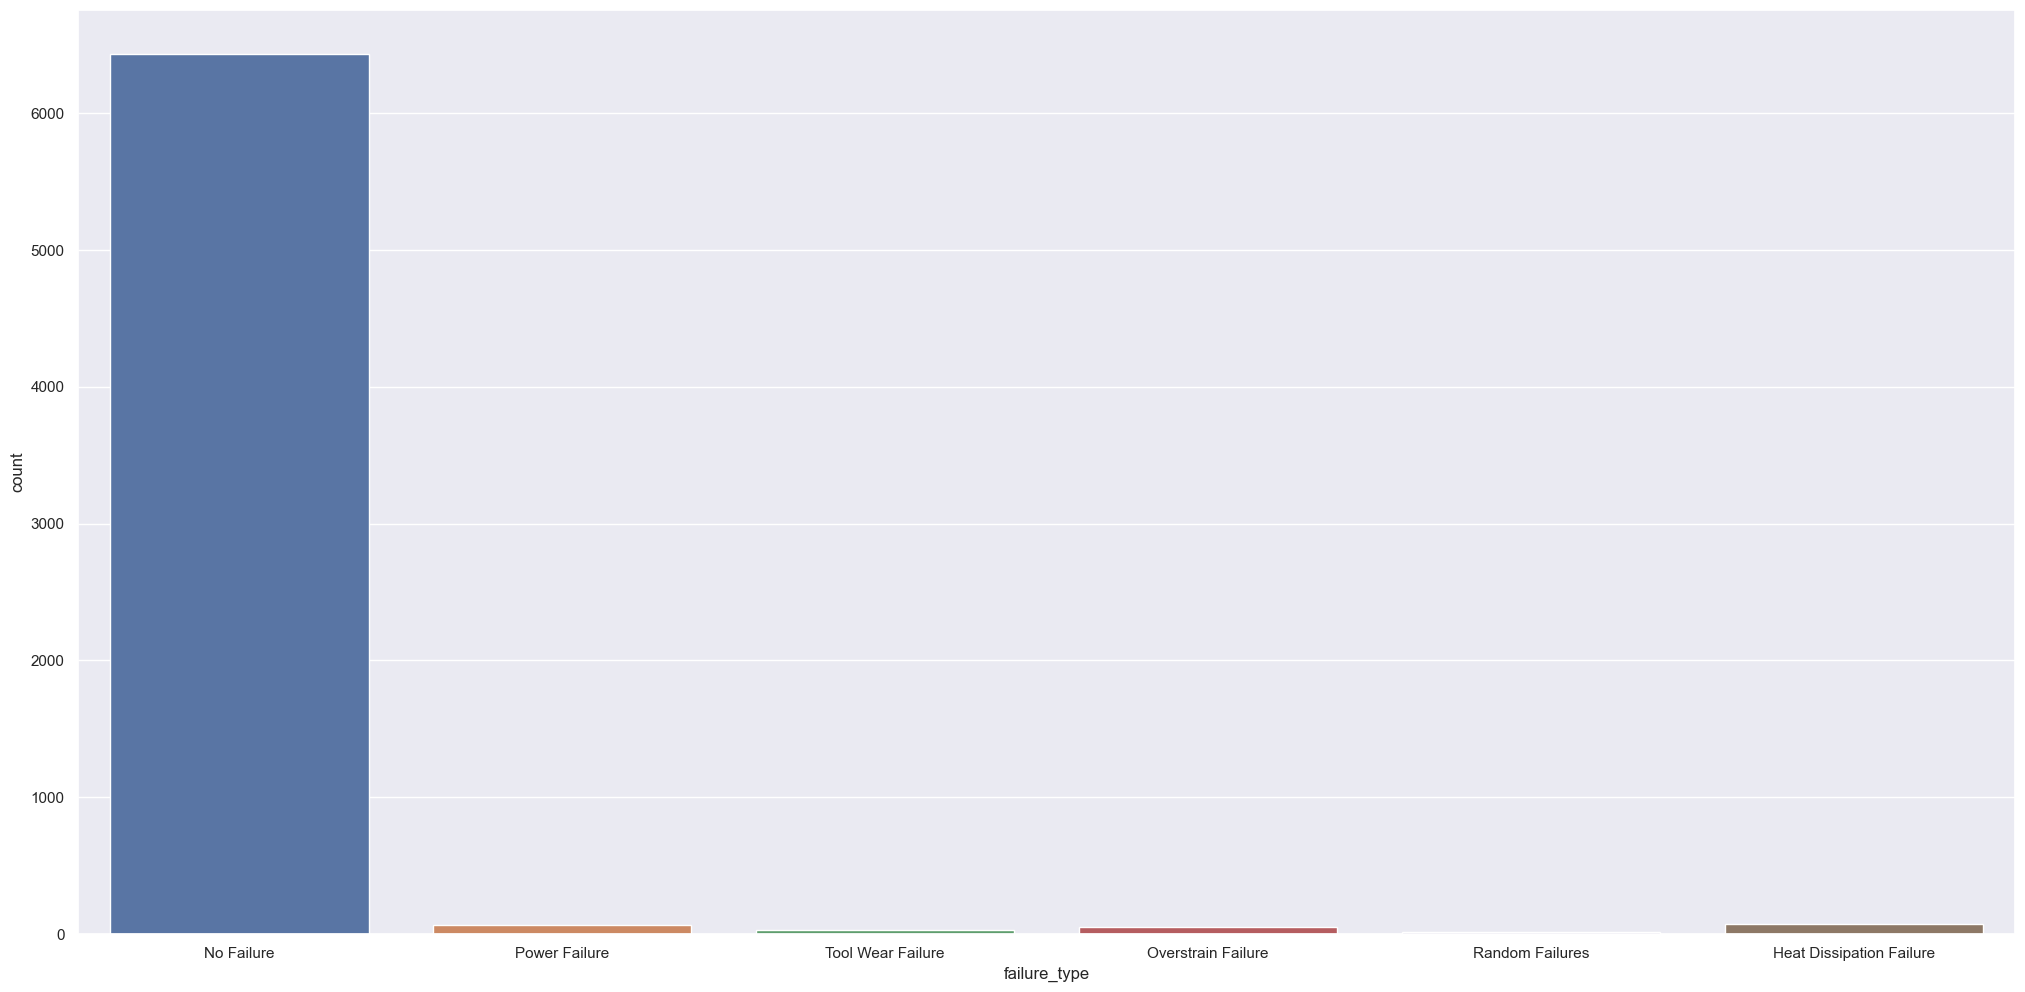

In [28]:
sns.countplot(x='failure_type',data=cat_attribures)

A variavel target 'failute_type' possui multiplas categorias

In [30]:
cat_attribures['failure_type'].value_counts(normalize=True)

No Failure                  0.965202
Heat Dissipation Failure    0.011249
Power Failure               0.009450
Overstrain Failure          0.007800
Tool Wear Failure           0.004500
Random Failures             0.001800
Name: failure_type, dtype: float64

Como existe uma categoria que representa quase 97% dos casos dentro de 'failure_type' estamos lidando com um desbalanceamento de classe

**Pela análise descritiva inicial, pode-se observar que o problema se trata de uma classificação multiclasse com desbalanceamento, onde não se encontrou nenhuma grande irregularidade nos dados**